# Astrophysical Reactions - $CNO$ Breakout

In [1]:
import pynucastro as pyrl

import numpy as np
import matplotlib.pyplot as plt
import cno_network_module as cno

from scipy.integrate import solve_ivp

Now we can write our $pp$ chain network. This permits to solve the differential equation and get the abundance evolution of each nuclei. In order to do that, we must also set the initial abundances for each nuclei:

In [2]:
import cno_network_module as cno

tmax = 1.e17

rho = 1
T = 1.2e8

X0 = np.zeros(cno.nnuc)

X0[cno.jp] = 10
X0[cno.jhe4] = 10
X0[cno.jo16] = 0.01
X0[cno.jo17] = 0.01
X0[cno.jo18] = 0.01
X0[cno.jf17] = 0.01
X0[cno.jf18] = 0.01
X0[cno.jf19] = 0.1
X0[cno.jne20] = 0
X0[cno.jne21] = 0
X0[cno.jne22] = 0
X0[cno.jna21] = 0
X0[cno.jna22] = 0
X0[cno.jna23] = 0

Y0 = X0/cno.A

sol = solve_ivp(cno.rhs, [0, tmax], Y0, method="BDF", dense_output=True, args=(rho, T), rtol=1.e-13, atol=1.e-13)

In [3]:
import cno_network_module_enhanced as cno

tmax = 1.e17

rho = 1
T = 1.2e8

X0 = np.zeros(cno.nnuc)

X0[cno.jp] = 10
X0[cno.jhe4] = 10
X0[cno.jo16] = 0.01
X0[cno.jo17] = 0.01
X0[cno.jo18] = 0.01
X0[cno.jf17] = 0.01
X0[cno.jf18] = 0.01
X0[cno.jf19] = 0.1
X0[cno.jne20] = 0
X0[cno.jne21] = 0
X0[cno.jne22] = 0
X0[cno.jna21] = 0
X0[cno.jna22] = 0
X0[cno.jna23] = 0

Y0 = X0/cno.A

sol_enh = solve_ivp(cno.rhs, [0, tmax], Y0, method="BDF", dense_output=True, args=(rho, T), rtol=1.e-13, atol=1.e-13)

Now we can plot the solution we calculated and see how the abundances change with time:

/var/folders/13/_3g2lmwx6xl3zshjv1d7yz4c0000gn/T/ipykernel_71587/2515094124.py:21: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0, 1.e8)


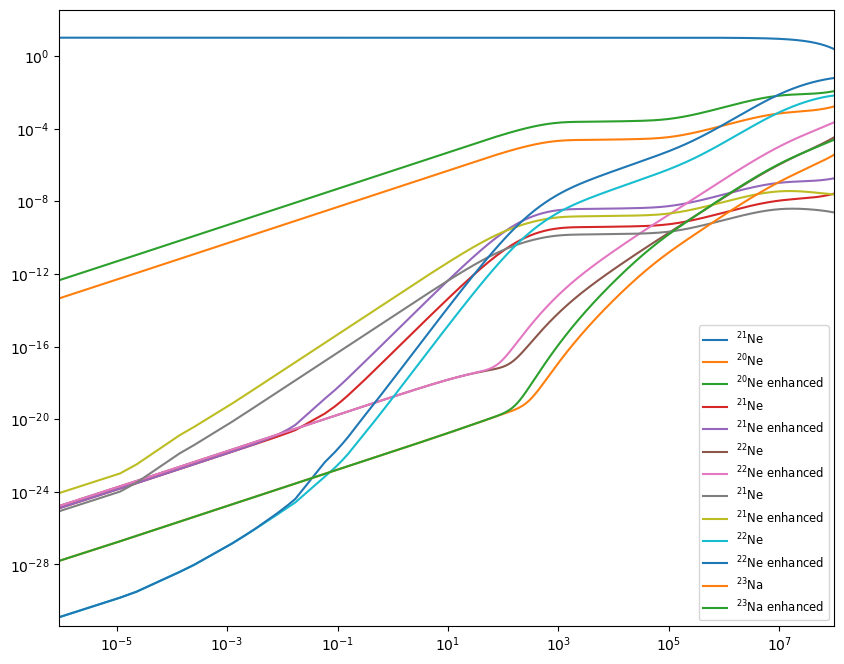

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(cno.nnuc):
    label = cno.names[i].capitalize()
    if( cno.A[i] == 20 ):
        ax.loglog(sol.t, sol.y[i,:] * cno.A[i], label=r"$^{20}$Ne")
        ax.loglog(sol_enh.t, sol_enh.y[i,:] * cno.A[i], label=r"$^{20}$Ne enhanced")
    if( cno.A[i] == 21 ):
        ax.loglog(sol.t, sol.y[i,:] * cno.A[i], label=r"$^{21}$Ne")
        ax.loglog(sol_enh.t, sol_enh.y[i,:] * cno.A[i], label=r"$^{21}$Ne enhanced")
    if( cno.A[i] == 22 ):
        ax.loglog(sol.t, sol.y[i,:] * cno.A[i], label=r"$^{22}$Ne")
        ax.loglog(sol_enh.t, sol_enh.y[i,:] * cno.A[i], label=r"$^{22}$Ne enhanced")
    if( cno.A[i] == 23 ):
        ax.loglog(sol.t, sol.y[i,:] * cno.A[i], label=r"$^{23}$Na")
        ax.loglog(sol_enh.t, sol_enh.y[i,:] * cno.A[i], label=r"$^{23}$Na enhanced")
    elif( cno.A[i] == 1 ):
        ax.loglog(sol.t, sol.y[i,:] * cno.A[i], label=r"$^{21}$Ne")

ax.set_xlim(0, 1.e8)
#ax.set_ylim(1.e-8, 1.0)
ax.legend(fontsize="small")

fig.set_size_inches((10, 8))

plt.savefig("figures/19f_enhanced.png")